# Trie

検索するパターンを木構造にすることで、検索を効率化する  
- メモリ: O( |Patterns| )
- 計算量: O( |Text| * |LongestPattern| )
- メリット: brute forceに比べて計算量が少ない
- デメリット: パターンの合計文字数のオーダー分だけメモリを消費する = メモリのコスパが悪い


## Brute Forceのデメリット
Brute Froceではパターンの数だけ検索が必要  
検索対象が増えるとそれだけ計算量が増える
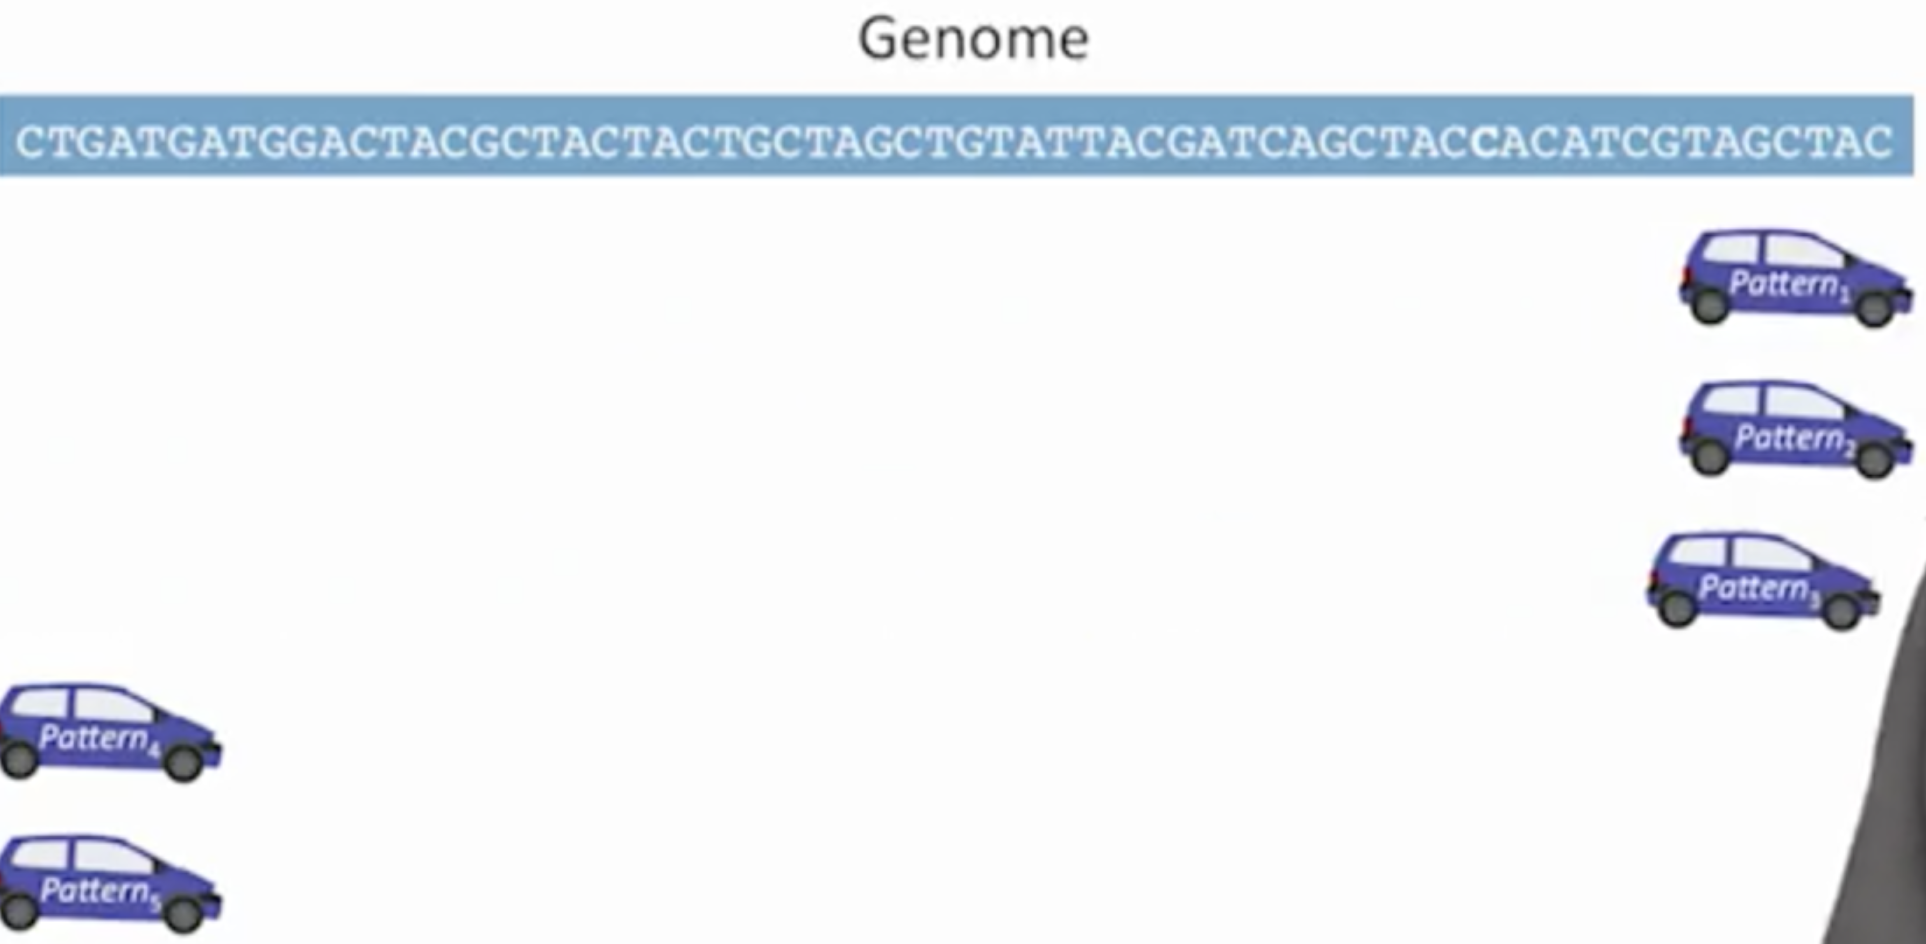
引用: https://www.coursera.org/learn/algorithms-on-strings/lecture/dryqB/herding-patterns-into-trie

## Trie構造の考え方
パターンをひとまとめにして一度の走査で検索を行う
計算量はテキストの長さと、最も文字数が多いパターンの長さに依存する
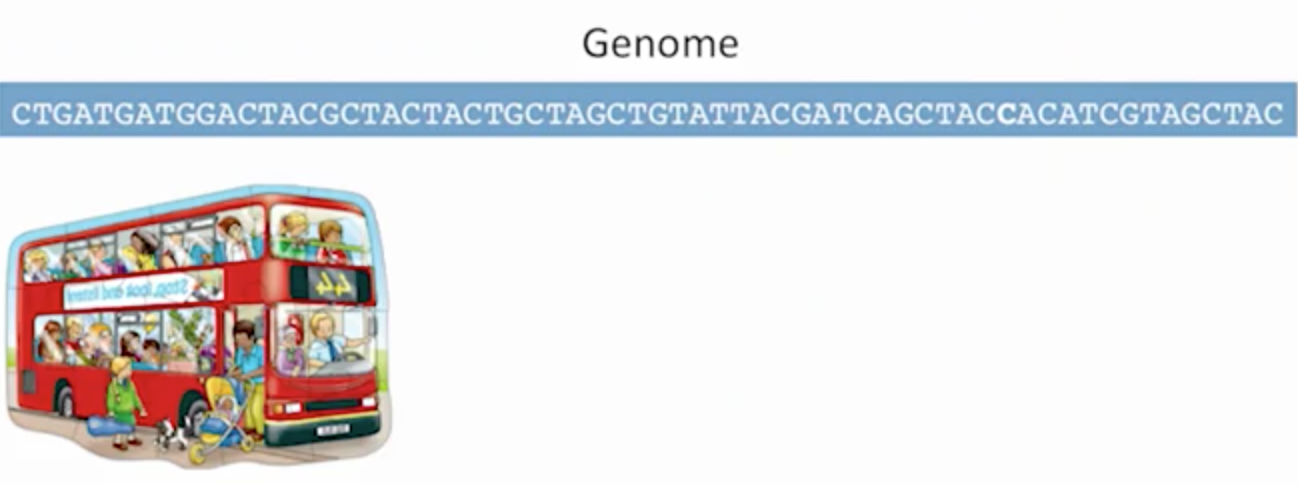
引用: https://www.coursera.org/learn/algorithms-on-strings/lecture/dryqB/herding-patterns-into-trie

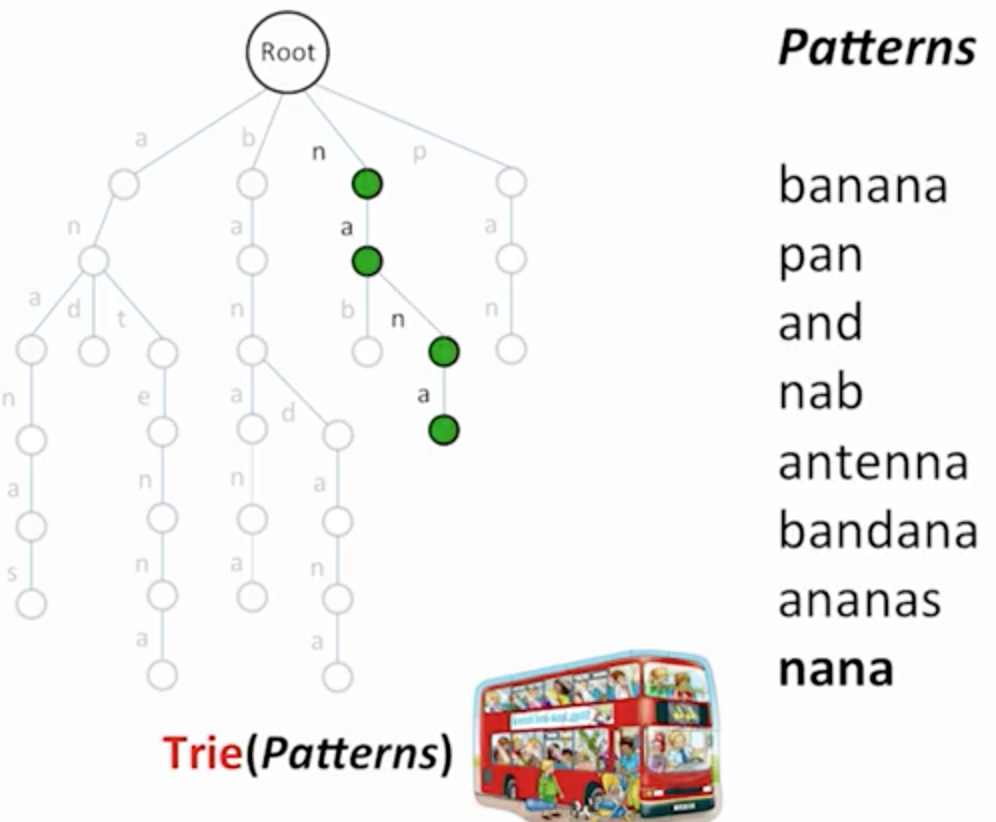
引用: https://www.coursera.org/learn/algorithms-on-strings/lecture/dryqB/herding-patterns-into-trie

In [119]:
class Node:
    """
    トライを構成する一つ一つのノード
    """
    def __init__(self, parent=None, value=False):
        self.parent = parent
        self.value = value
        self.children = {}

In [152]:
class Trie:
    """
    トライ構造
    addだけ実装
    """
    def __init__(self):
        self.root = Node()
        
    def add(self, pattern):
        node = self.root
        for p in pattern:
            if p in node.children:
                node = node.children[p]
            else:
                child = Node(node)
                node.children[p] = child
                node = node.children[p]
        node.value = True

In [153]:
def trie_matching(text: str, patterns: list):
    results = {p:[] for p in patterns}
    trie = Trie()
    root = trie.root
    # パターンからトライ構造を構築
    for pattern in patterns:
        trie.add(pattern)
    
    # テキストに対してトライをマッチング
    # findのようにパターンごとにインデックスを返す
    for i, _ in enumerate(text):
        j = i
        node = root
        try:
            pattern = ''
            while text[j] in node.children:
                pattern += text[j]
                node = node.children[text[j]]
                if node.value:
                    results[pattern].append(i)
                j += 1
        except:
            pass
    
    return results

## panamabananaでテスト

In [157]:
text = 'panamabanana'
patterns = [
    'banana',
    'pan',
    'and',
    'nab',
    'antenna',
    'bandana',
    'ananas',
    'nana',
    'na'
]
trie_matching(text, patterns)

{'ananas': [],
 'and': [],
 'antenna': [],
 'banana': [6],
 'bandana': [],
 'na': [2, 8, 10],
 'nab': [],
 'nana': [8],
 'pan': [0]}

## brownコーパスでテスト

In [155]:
with open('./sample.txt', 'r') as f:
    text = f.read()
patterns = [
    'do',
    'what',
    'make'
]

In [156]:
%time trie_matching(text, patterns)

CPU times: user 2.5 ms, sys: 2 µs, total: 2.5 ms
Wall time: 2.5 ms


{'do': [2697, 3429, 3934, 9236, 10165, 10708],
 'make': [6395, 7680, 8500],
 'what': [7617]}

参考: 
- https://github.com/dhain/trie/blob/master/trie.py
- https://towardsdatascience.com/implementing-a-trie-data-structure-in-python-in-less-than-100-lines-of-code-a877ea23c1a1
- https://en.wikipedia.org/wiki/Trie